In [1]:
import numpy as np
from pypde.bases.chebyshev import *
from numpy.linalg import solve
from pypde.field import *
from pypde.spectralspace import *
import matplotlib.pyplot as plt    
            
N = 5
shape = (N,N-1)
field = SpectralField(N,"CH")
field = SpectralField(shape,("CH","CH"))

xx,yy = np.meshgrid(field.x,field.y,indexing="ij")
u = np.sin(xx)*np.sin(yy)

print(u)
uhat = field.forward(u)
u = field.backward(uhat)
field.check()
print(u)

[[ 0.70807342  0.40342268 -0.40342268 -0.70807342]
 [ 0.54665063  0.31145254 -0.31145254 -0.54665063]
 [-0.         -0.          0.          0.        ]
 [-0.54665063 -0.31145254  0.31145254  0.54665063]
 [-0.70807342 -0.40342268  0.40342268  0.70807342]]
[[ 0.70807342  0.40342268 -0.40342268 -0.70807342]
 [ 0.54665063  0.31145254 -0.31145254 -0.54665063]
 [ 0.          0.          0.          0.        ]
 [-0.54665063 -0.31145254  0.31145254  0.54665063]
 [-0.70807342 -0.40342268  0.40342268  0.70807342]]


In [2]:
N = 10
shape = (N,N)
field = Field(shape)

NameError: name 'Field' is not defined

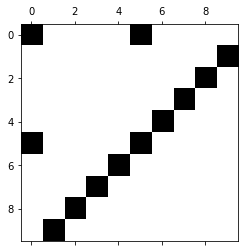

In [16]:
from pypde.bases.inner import *
from pypde.bases import *
from pypde.utils import *
import matplotlib.pyplot as plt
N = 10

F = Fourier(N)
F.k
M = inner(F,F,w="NO",D=(0,0))
M = to_sparse(M).toarray()
plt.spy(M)

In [2]:
np.real(M)

NameError: name 'M' is not defined

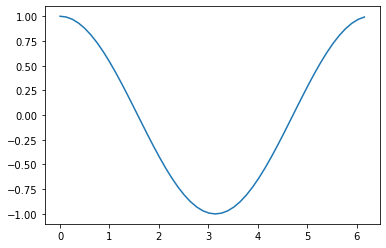

0.510204081632653

In [9]:

x = F.x
y = F.get_basis_derivative(i=1,k=4)
plt.plot(x,y)
plt.show()

y = np.real(y)
inner(y,y,w="NO")

In [4]:
from pypde.bases.inner import *
from pypde.bases import *
from pypde.utils import *
import matplotlib.pyplot as plt
N = 7

F = Fourier(N)
F.k
y = np.sin(F.x)
yhat = F.forward_fft(y)
#print(yhat)
yhat.size

inner(F,F,D=(0,3))

[0 1 2 3] 3


array([[ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  4. ,  0. ],
       [ 0. ,  0. ,  0. , 13.5]])

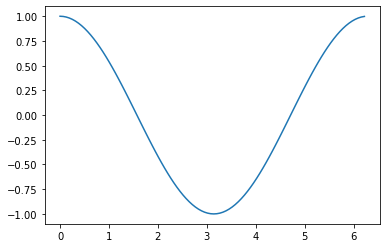

0.5050505062949441

In [25]:
x = F.x
y = F.get_basis_derivative(i=1,k=4)
y = F.derivative(y,deriv=4,method="dm")
plt.plot(x,y)
plt.show()

y = np.real(y)
inner(y,y,w="NO")

[-2.43492987e-11  9.65273059e-13  2.02400517e-01 -1.71323188e-14
 -1.13447626e-02 -3.90238532e-15  2.41831454e-04  5.10152182e-15
 -2.71718889e-06 -2.23193579e-15  1.88588290e-08  4.36906587e-16
 -8.88976205e-11  2.10077074e-18  3.03205599e-13  6.68589837e-17
 -7.56666082e-16 -2.39353375e-16 -4.91744500e-17  1.79041823e-16
 -1.06343756e-16 -2.06255975e-17  2.82924257e-17  2.79962503e-17
 -1.07882822e-16 -2.77678222e-17  1.96138523e-16 -4.09090726e-17
 -2.20346407e-16  1.21578792e-17  2.78692090e-16  5.63963219e-17
 -3.60335093e-16 -4.37424194e-17  2.00761354e-16 -1.91396937e-17
  4.82642135e-17  2.03124577e-17 -1.58207858e-16 -1.32761155e-17
  1.24977275e-16  1.57735778e-17 -1.39206839e-16 -1.17447810e-17
  3.62023200e-17  4.06976736e-18  7.84336721e-17  2.87265101e-18
 -2.54016241e-17 -9.24236752e-18]


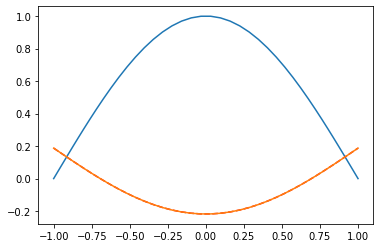

In [56]:
N = 50
C = Chebyshev(N)
x = C.x
D2 = C.spec_deriv_mat(2)

arg = 1*np.pi/2
f = np.cos(arg*x)
fsol = -arg**-2*np.cos(1*np.pi/2*x)

fhat = C.forward_fft(f)

chat = np.zeros(f.size)
chat[:] = np.linalg.lstsq(D2[:,:],fhat[:],rcond=None)[0]
print(chat)
c = C.backward_fft(chat)
c -= np.average(c)


plt.plot(x,f)
fsol -= np.average(fsol)
plt.plot(x,fsol,"r--")
plt.plot(x,c)
plt.show()

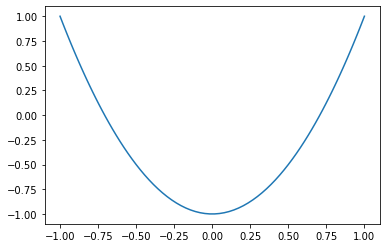

In [36]:
plt.plot(x,C.get_basis(i=2))

In [14]:
fhat

array([-3.04242178e-01,  1.13720761e-17, -9.70867865e-01,  2.15876699e-17,
        3.02849144e-01, -2.46716228e-17, -2.90911557e-02,  9.86864911e-17,
        1.35205405e-03,  0.00000000e+00])

In [64]:
N = 6
C = Chebyshev(N)
CD = ChebDirichlet(N)

B = C.B(2)
S = CD.S

(B@S)[2:,:]

array([[ 0.41666667,  0.        , -0.16666667,  0.        ],
       [ 0.        ,  0.10416667,  0.        , -0.0625    ],
       [-0.02083333,  0.        ,  0.02083333,  0.        ],
       [ 0.        , -0.0125    ,  0.        ,  0.0125    ]])

In [63]:
B = B[2:,:]
B@S

array([[ 0.41666667,  0.        , -0.16666667,  0.        ],
       [ 0.        ,  0.10416667,  0.        , -0.0625    ],
       [-0.02083333,  0.        ,  0.02083333,  0.        ],
       [ 0.        , -0.0125    ,  0.        ,  0.0125    ]])

In [60]:
B.shape

(6, 6)

In [61]:
S.shape

(6, 4)